In [170]:
%pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**CONNECTING TO NEO4J DATABASE**

In [172]:
from neo4j import GraphDatabase

# Set Neo4j Server URI, Username, and Password
uri = "bolt://localhost:7687"  # Bolt protocol URI
username = "neo4j"              # Default username
password = "Renu@2802"          # Replace with your password

# Initialize the Neo4j driver
driver = GraphDatabase.driver(uri, auth=(username, password))

def test_connection():
    try:
        # Start a Neo4j session
        with driver.session() as session:
            # Run a simple Cypher query to check the connection
            result = session.run("RETURN 'Connection Successful' AS message")
            for record in result:
                print(record["message"])  # Print the success message
    except Exception as e:
        print(f"Connection failed: {e}")  # Print the error message if connection fails

# Test the connection
test_connection()


Connection Successful


**FETCHING NODES FROM NEO4J DATABASE**

In [173]:
def fetch_all_nodes():
    with driver.session() as session:
        result = session.run("MATCH (n) RETURN labels(n) AS labels, properties(n) AS properties LIMIT 10")
        for record in result:
            print(f"Node Labels: {record['labels']}, Properties: {record['properties']}")

fetch_all_nodes()

Node Labels: ['Candidate'], Properties: {'college_year': 4, 'cgpa': 6.67, 'name': 'Tamara Cole', 'college': 'Anna University', 'experience': 5.5, 'leetcode_score': 442}
Node Labels: ['Candidate'], Properties: {'college_year': 2, 'cgpa': 8.03, 'name': 'David Bennett', 'college': 'Anna University', 'experience': 0.0, 'leetcode_score': 1279}
Node Labels: ['Candidate'], Properties: {'college_year': 1, 'cgpa': 7.05, 'name': 'Kevin Roberts', 'college': 'BITS Pilani', 'experience': 0.0, 'leetcode_score': 7984}
Node Labels: ['Candidate'], Properties: {'college_year': 1, 'cgpa': 7.93, 'name': 'Mrs. Cynthia Choi', 'college': 'NIT Rourkela', 'experience': 0.0, 'leetcode_score': 6038}
Node Labels: ['Candidate'], Properties: {'college_year': 4, 'cgpa': 6.8, 'name': 'Paul Hood', 'college': 'IIT Bombay', 'experience': 0.0, 'leetcode_score': 5295}
Node Labels: ['Candidate'], Properties: {'college_year': 1, 'cgpa': 7.01, 'name': 'Dawn Banks', 'college': 'Anna University', 'experience': 0.0, 'leetcode_s

**CANDIDATE NODES**

In [174]:
def fetch_candidates(tx):
    query = "MATCH (c:Candidate) RETURN c LIMIT 5"
    result = tx.run(query)
    return [record["c"] for record in result]  # Extracting node data

# Run Query (Fixed)
with driver.session() as session:
    candidates = session.execute_read(fetch_candidates)  

print("\n ----CANDIDATE NODES-----")
# Print Candidates Data
for idx, candidate in enumerate(candidates, start=1):
    print(f"{idx}. {candidate}")


 ----CANDIDATE NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:7781' labels=frozenset({'Candidate'}) properties={'college': 'Anna University', 'name': 'Tamara Cole', 'college_year': 4, 'cgpa': 6.67, 'experience': 5.5, 'leetcode_score': 442}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:7782' labels=frozenset({'Candidate'}) properties={'college': 'Anna University', 'name': 'David Bennett', 'college_year': 2, 'cgpa': 8.03, 'experience': 0.0, 'leetcode_score': 1279}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:7783' labels=frozenset({'Candidate'}) properties={'college': 'BITS Pilani', 'name': 'Kevin Roberts', 'college_year': 1, 'cgpa': 7.05, 'experience': 0.0, 'leetcode_score': 7984}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:7784' labels=frozenset({'Candidate'}) properties={'college': 'NIT Rourkela', 'name': 'Mrs. Cynthia Choi', 'college_year': 1, 'cgpa': 7.93, 'experience': 0.0, 'leetcode_score': 6038}>
5. <Node el

**CERTIFICATIONS NODES**

In [175]:
def fetch_certifications(tx):
    query = "MATCH (c:Certification) RETURN c LIMIT 10"
    result = tx.run(query)
    return [record["c"] for record in result]  # Extracting node data

# Run Query
with driver.session() as session:
    certifications = session.execute_read(fetch_certifications)  

print("\n ----CERTIFICATION NODES-----")
# Print Certifications Data
for idx, cert in enumerate(certifications, start=1):
    print(f"{idx}. {cert}")


 ----CERTIFICATION NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9732' labels=frozenset({'Certification'}) properties={'name': 'Microsoft Azure Certified'}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9733' labels=frozenset({'Certification'}) properties={'name': 'Oracle SQL Expert'}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9734' labels=frozenset({'Certification'}) properties={'name': 'Google Cloud Certified'}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9735' labels=frozenset({'Certification'}) properties={'name': 'Certified Ethical Hacker'}>
5. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9736' labels=frozenset({'Certification'}) properties={'name': 'AWS Certified'}>


**COLLEGE NODES**

In [176]:
def fetch_colleges(tx):
    query = "MATCH (c:College) RETURN c LIMIT 10"
    result = tx.run(query)
    return [record["c"] for record in result]

with driver.session() as session:
    colleges = session.execute_read(fetch_colleges)

print("\n ----COLLEGE NODES-----")
for idx, college in enumerate(colleges, start=1):
    print(f"{idx}. {college}")


 ----COLLEGE NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9719' labels=frozenset({'College'}) properties={'name': 'Anna University'}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9720' labels=frozenset({'College'}) properties={'name': 'BITS Pilani'}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9721' labels=frozenset({'College'}) properties={'name': 'NIT Rourkela'}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9722' labels=frozenset({'College'}) properties={'name': 'IIT Bombay'}>
5. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9723' labels=frozenset({'College'}) properties={'name': 'Symbiosis International University'}>
6. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9724' labels=frozenset({'College'}) properties={'name': 'Manipal University'}>


**INTERNSHIP NODES**

In [177]:
def fetch_internships(tx):
    query = "MATCH (i:Internship) RETURN i LIMIT 10"
    result = tx.run(query)
    return [record["i"] for record in result]

with driver.session() as session:
    internships = session.execute_read(fetch_internships)

print("\n ----INTERNSHIP NODES-----")
for idx, internship in enumerate(internships, start=1):
    print(f"{idx}. {internship}")



 ----INTERNSHIP NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9760' labels=frozenset({'Internship'}) properties={'name': 'TechCorp', 'created_at': 1742129272878}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9761' labels=frozenset({'Internship'}) properties={'name': 'Google', 'created_at': 1742129272878}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9762' labels=frozenset({'Internship'}) properties={'name': 'Facebook', 'created_at': 1742129272878}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9763' labels=frozenset({'Internship'}) properties={'name': 'Microsoft', 'created_at': 1742129272878}>
5. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9764' labels=frozenset({'Internship'}) properties={'name': 'Amazon', 'created_at': 1742129272878}>
6. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9765' labels=frozenset({'Internship'}) properties={'name': 'StartUp X', 'created_at': 1742129272878}>
7. <Node

**LANGUAGE NODES**

In [178]:
def fetch_languages(tx):
    query = "MATCH (l:Language) RETURN l LIMIT 10"
    result = tx.run(query)
    return [record["l"] for record in result]

with driver.session() as session:
    languages = session.execute_read(fetch_languages)

print("\n ----LANGUAGE NODES-----")
for idx, language in enumerate(languages, start=1):
    print(f"{idx}. {language}")



 ----LANGUAGE NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9728' labels=frozenset({'Language'}) properties={'name': 'German'}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9729' labels=frozenset({'Language'}) properties={'name': 'English'}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9730' labels=frozenset({'Language'}) properties={'name': 'Spanish'}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9731' labels=frozenset({'Language'}) properties={'name': 'French'}>


**PUBLICATION NODES**

In [179]:
def fetch_publications(tx):
    query = "MATCH (p:Publication) RETURN p LIMIT 10"
    result = tx.run(query)
    return [record["p"] for record in result]

with driver.session() as session:
    publications = session.execute_read(fetch_publications)

print("\n ----PUBLICATION NODES-----")
for idx, publication in enumerate(publications, start=1):
    print(f"{idx}. {publication}")



 ----PUBLICATION NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9725' labels=frozenset({'Publication'}) properties={'type': 'Journal'}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9726' labels=frozenset({'Publication'}) properties={'type': 'Research Paper'}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9727' labels=frozenset({'Publication'}) properties={'type': 'Conference Paper'}>


**SKILL NODES**

In [180]:
def fetch_skills(tx):
    query = "MATCH (s:Skill) RETURN s LIMIT 100"
    result = tx.run(query)
    return [record["s"] for record in result]

with driver.session() as session:
    skills = session.execute_read(fetch_skills)

print("\n ----SKILL NODES-----")
for idx, skill in enumerate(skills, start=1):
    print(f"{idx}. {skill}")



 ----SKILL NODES-----
1. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9767' labels=frozenset({'Skill'}) properties={'name': 'Cloud Computing'}>
2. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9768' labels=frozenset({'Skill'}) properties={'name': 'Machine Learning'}>
3. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9769' labels=frozenset({'Skill'}) properties={'name': 'Python'}>
4. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9770' labels=frozenset({'Skill'}) properties={'name': 'Java'}>
5. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9771' labels=frozenset({'Skill'}) properties={'name': 'C++'}>
6. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9772' labels=frozenset({'Skill'}) properties={'name': 'SQL'}>
7. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9773' labels=frozenset({'Skill'}) properties={'name': 'Web Development'}>
8. <Node element_id='4:a5685481-adf4-4315-86a5-87edbb7735db:9774' labels=frozenset

**RELATIONSHIPS**

In [181]:
def fetch_relationships(tx):
    query = "CALL db.relationshipTypes() YIELD relationshipType RETURN relationshipType"
    return [record["relationshipType"] for record in tx.run(query)]

#Open a session & execute safely
with driver.session() as session:
    relationships = session.execute_read(fetch_relationships)

#Print results
print("\n ----RELATIONSHIPS----")
if relationships:
    for rel in relationships:
        print(f"- {rel}")
else:
    print("No relationships found.")



 ----RELATIONSHIPS----
- HAS_SKILL
- SPEAKS
- PUBLISHED
- STUDIED_AT
- HAS_CERTIFICATION
- HAS_INTERNSHIP


**WEIGHTED RANKING ALGORITHM**
**Weightage followed-->
Skills (30%) > Internships (20%) > LeetCode (15%) > CGPA (10%) = Certifications (10%) = Publications (10%) > Languages (5%)**

In [182]:
# ✅ Fetch Candidate Data
def fetch_all_candidate_data():
    query = """
    MATCH (c:Candidate)
    OPTIONAL MATCH (c)-[:HAS_CERTIFICATION]->(cert:Certification)
    OPTIONAL MATCH (c)-[:HAS_INTERNSHIP]->(i:Internship)
    OPTIONAL MATCH (c)-[r:HAS_SKILL]->(s:Skill)
    OPTIONAL MATCH (c)-[:SPEAKS]->(l:Language)
    OPTIONAL MATCH (c)-[p:PUBLISHED]->(pub:Publication)
    RETURN 
        c.name AS Name, 
        COALESCE(c.cgpa, 0) AS CGPA, 
        COALESCE(c.leetcode_score, 0) AS LeetCodeScore, 
        COUNT(DISTINCT cert) AS CertificationCount, 
        COUNT(DISTINCT i) AS InternshipCount, 
        COUNT(DISTINCT s) AS SkillCount, 
        COALESCE(SUM(r.proficiency), 0) AS TotalSkillProficiency, 
        COUNT(DISTINCT l) AS LanguageCount, 
        COALESCE(SUM(p.count), 0) AS PaperCount, 
        [t IN COLLECT(DISTINCT pub.type) WHERE t IS NOT NULL] AS PaperTypes
    """

    candidates = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            candidates.append({
                "Name": record["Name"],
                "CGPA": record["CGPA"],
                "LeetCodeScore": record["LeetCodeScore"],
                "CertificationCount": record["CertificationCount"],
                "InternshipCount": record["InternshipCount"],
                "SkillCount": record["SkillCount"],
                "TotalSkillProficiency": record["TotalSkillProficiency"],
                "LanguageCount": record["LanguageCount"],
                "PaperCount": record["PaperCount"],
                "PaperTypes": record["PaperTypes"]
            })
    return candidates

# ✅ Scoring Functions
def calculate_cgpa_score(cgpa, max_cgpa=10, weight=10):
    return round((cgpa / max_cgpa) * weight, 2) if cgpa else 0

def calculate_leetcode_score(score, max_score, weight=15):
    return round((score / max_score) * weight, 2) if max_score else 0

def calculate_paper_score(count, types, max_papers, weight=10):
    WEIGHTS = {"Conference Paper": 5, "Journal": 3, "Research Paper": 2}
    weighted_score = sum((count / max(max_papers.get(t, 1), 1)) * WEIGHTS.get(t, 0) for t in types)
    return round((weighted_score / sum(WEIGHTS.values())) * weight, 2) if types else 0

def calculate_certification_score(count, max_cert=5, weight=10):
    return round((min(count, max_cert) / max_cert) * weight, 2)

def calculate_language_score(count, max_languages=5, weight=5):
    return round((min(count, max_languages) / max_languages) * weight, 2)

def calculate_internship_score(count, max_internships=3, weight=20):
    return round((min(count, max_internships) / max_internships) * weight, 2)

def calculate_skill_score(count, proficiency, max_skills=10, weight=30):
    normalized_skill_score = min(count, max_skills) / max_skills
    return round(normalized_skill_score * weight, 2)

# ✅ Compute Max Values Dynamically
def get_max_values(candidates):
    return {
        "max_leetcode": max((c["LeetCodeScore"] for c in candidates), default=1),
        "max_papers": {
            "Conference Paper": max((c["PaperCount"] for c in candidates if "Conference Paper" in c["PaperTypes"]), default=1),
            "Journal": max((c["PaperCount"] for c in candidates if "Journal" in c["PaperTypes"]), default=1),
            "Research Paper": max((c["PaperCount"] for c in candidates if "Research Paper" in c["PaperTypes"]), default=1),
        }
    }

# ✅ Process and Compute Scores
def process_candidates():
    candidates = fetch_all_candidate_data()
    max_values = get_max_values(candidates)

    processed_data = []
    for c in candidates:
        processed_data.append({
            "Name": c["Name"],
            "CGPA Score": calculate_cgpa_score(c["CGPA"]),
            "LeetCode Score": calculate_leetcode_score(c["LeetCodeScore"], max_values["max_leetcode"]),
            "Publication Score": calculate_paper_score(c["PaperCount"], c["PaperTypes"], max_values["max_papers"]),
            "Certification Score": calculate_certification_score(c["CertificationCount"]),
            "Language Score": calculate_language_score(c["LanguageCount"]),
            "Internship Score": calculate_internship_score(c["InternshipCount"]),
            "Skill Score": calculate_skill_score(c["SkillCount"], c["TotalSkillProficiency"]),
        })

    return pd.DataFrame(processed_data)

# ✅ Run & Print Final DataFrame
df = process_candidates()
print(df)


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: '\n    MATCH (c:Candidate)\n    OPTIONAL MATCH (c)-[:HAS_CERTIFICATION]->(cert:Certification)\n    OPTIONAL MATCH (c)-[:HAS_INTERNSHIP]->(i:Internship)\n    OPTIONAL MATCH (c)-[r:HAS_SKILL]->(s:Skill)\n    OPTIONAL MATCH (c)-[:SPEAKS]->(l:Language)\n    OPTIONAL MATCH (c)-[p:PUBLISHED]->(pub:Publication)\n    RETURN \n        c.name AS Name, \n        COALESCE(c.cgpa, 0) AS CGPA, \n        COALESCE(c.leetcode_score, 0) AS LeetCodeScore, \n        COUNT(DISTINCT cert) AS CertificationCount, \n        COUNT(DISTINCT i) AS InternshipCount, \n        COUNT(DISTINCT s) AS SkillCount, \n        COALESCE(SUM(r.proficiency), 0) AS TotalSkillProficiency, \n        COUNT(DISTINCT l) AS Language

                   Name  CGPA Score  LeetCode Score  Publication Score  \
0           Tamara Cole        6.67            0.34               0.37   
1         David Bennett        8.03            0.97               0.33   
2         Kevin Roberts        7.05            6.07               0.15   
3     Mrs. Cynthia Choi        7.93            4.59               0.06   
4             Paul Hood        6.80            4.02               1.67   
...                 ...         ...             ...                ...   
1933      John Crawford        8.04            3.60               0.22   
1934   Heather Cardenas        9.35            5.47               0.04   
1935     Wayne Williams        7.35            3.94               1.11   
1936         Kyle Hayes        8.96            0.57               0.17   
1937       Amanda Kline        9.11            2.98               0.07   

      Certification Score  Language Score  Internship Score  Skill Score  
0                     0.0           

**TOTAL SCORE CALCULATION**

In [183]:
# ✅ Calculate Total Score with Proper Weightage
def calculate_total_score(df):
    df["Total Score"] = (
        df["CGPA Score"] +
        df["LeetCode Score"] +
        df["Publication Score"] +
        df["Certification Score"] +
        df["Language Score"] +
        df["Internship Score"] +
        df["Skill Score"]
    )
    return df

df = calculate_total_score(df)
print(df[["Name", "Total Score"]])


                   Name  Total Score
0           Tamara Cole        37.71
1         David Bennett        26.33
2         Kevin Roberts        30.27
3     Mrs. Cynthia Choi        24.58
4             Paul Hood        35.49
...                 ...          ...
1933      John Crawford        25.86
1934   Heather Cardenas        23.86
1935     Wayne Williams        33.40
1936         Kyle Hayes        20.70
1937       Amanda Kline        25.16

[1938 rows x 2 columns]


**RANKING**

In [184]:
def assign_rank(df):
    df["Rank"] = df["Total Score"].rank(ascending=False, method="min").astype(int)
    return df.sort_values(by="Total Score", ascending=False)

df = assign_rank(df)
print(df[["Rank", "Name", "Total Score"]])


      Rank             Name  Total Score
124      1      Julia Leach        61.34
1203     2    Dylan Marquez        53.41
538      3   Kelly Griffith        51.48
895      4  Michael Johnson        51.41
1417     5       Leah Gomez        50.74
...    ...              ...          ...
327   1934   Scott Ferguson        15.88
965   1935      John Sparks        15.70
1150  1936      John Jensen        15.59
1514  1937   Michael Taylor        15.17
1612  1938       Ann Turner        14.13

[1938 rows x 3 columns]


**VISUALIZATIONS**

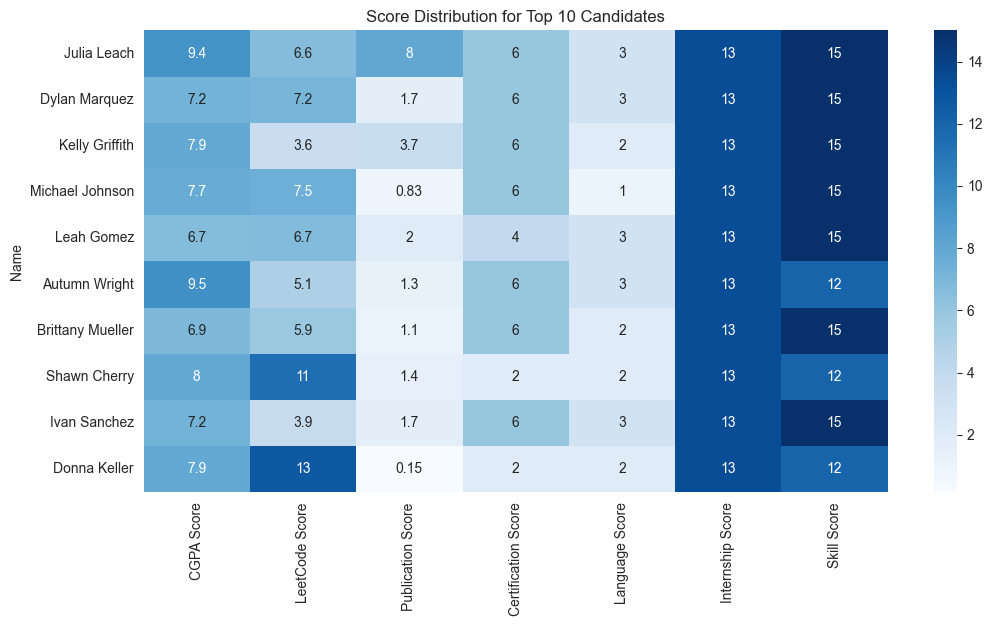

In [185]:
# ✅ Select Top 10 Candidates
top_10 = df.nlargest(10, "Total Score")

# ✅ Create Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    top_10.set_index("Name")[["CGPA Score", "LeetCode Score", "Publication Score", 
                              "Certification Score", "Language Score", "Internship Score", 
                              "Skill Score"]],
    annot=True, cmap="Blues"
)
plt.title("Score Distribution for Top 10 Candidates")
plt.show()

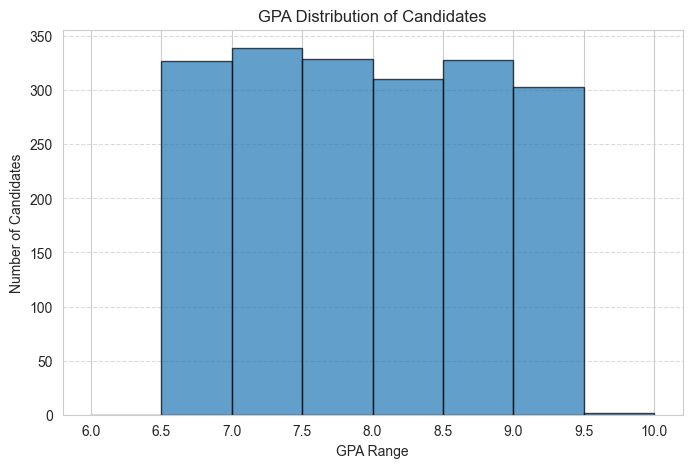

In [186]:
# Function to fetch GPA data
def fetch_gpa_data():
        with driver.session() as session:
            query = "MATCH (c:Candidate) RETURN c.cgpa AS GPA"
            result = session.run(query)
            return [record["GPA"] for record in result if record["GPA"] is not None]

# Fetch GPA Data
gpa_data = fetch_gpa_data()

# Create Histogram
plt.figure(figsize=(8, 5))
bins = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
plt.hist(gpa_data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel("GPA Range")
plt.ylabel("Number of Candidates")
plt.title("GPA Distribution of Candidates")
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


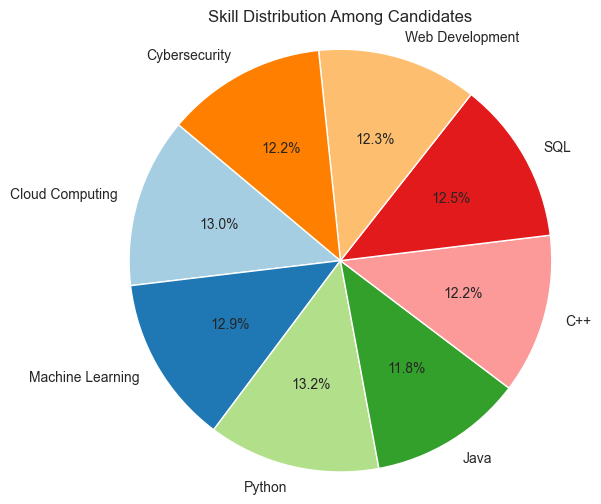

In [187]:
# Function to fetch skill data
def fetch_skill_data():
    with driver.session() as session:
        query = """
        MATCH (s:Skill)<-[:HAS_SKILL]-(c:Candidate)
        RETURN s.name AS Skill, count(c) AS Count
        """
        result = session.run(query)
        return {record["Skill"]: record["Count"] for record in result}

# Fetch skill data
skill_data = fetch_skill_data()

# Extract labels and values
labels = list(skill_data.keys())
sizes = list(skill_data.values())

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Skill Distribution Among Candidates")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()



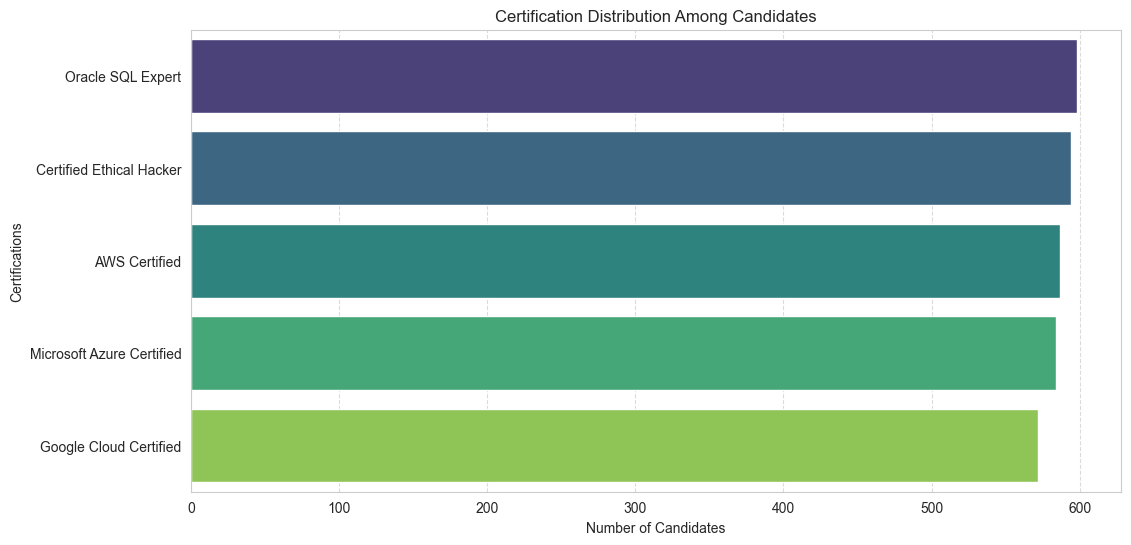

In [188]:
# Function to Fetch Certification Data
def fetch_certification_data():
        with driver.session() as session:
            query = """
            MATCH (c:Candidate)-[:HAS_CERTIFICATION]->(cert:Certification)
            RETURN cert.name AS Certification, COUNT(c) AS CandidateCount
            ORDER BY CandidateCount DESC
            """
            result = session.run(query)
            return [(record["Certification"], record["CandidateCount"]) for record in result]

# Fetch Data
certification_data = fetch_certification_data()

# Extract Labels and Values
certifications, counts = zip(*certification_data) if certification_data else ([], [])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(certifications), hue=certifications, legend=False, palette="viridis")
plt.xlabel("Number of Candidates")
plt.ylabel("Certifications")
plt.title("Certification Distribution Among Candidates")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

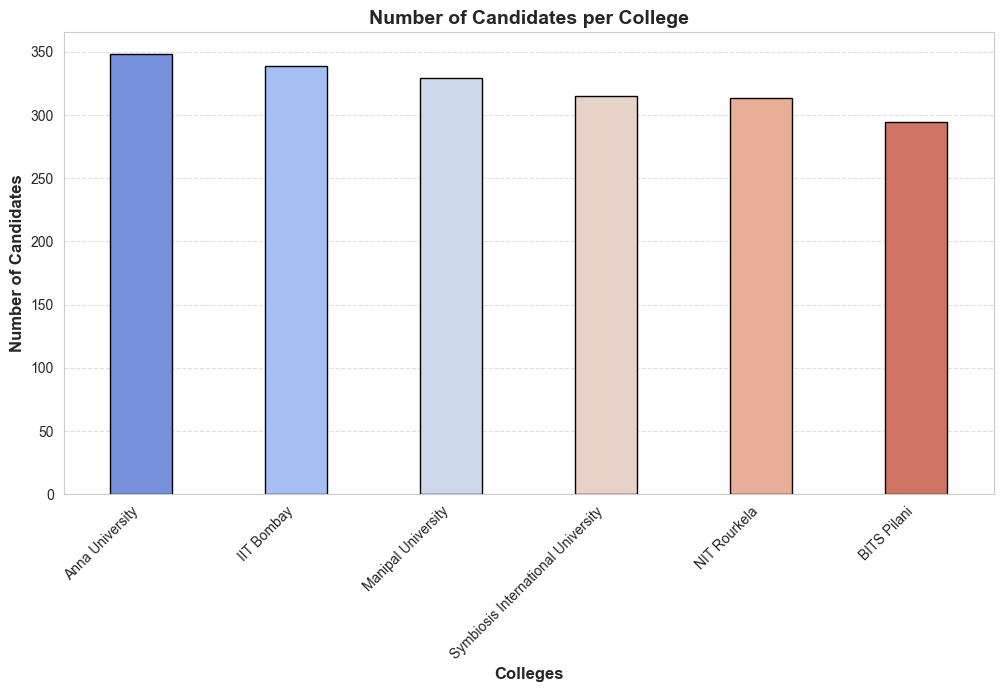

In [189]:
# Function to fetch college distribution data
def fetch_college_data(driver):
    with driver.session() as session:
        query = """
        MATCH (c:College)<-[:STUDIED_AT]-(s:Candidate)
        RETURN c.name AS College, COUNT(s) AS CandidateCount
        ORDER BY CandidateCount DESC
        """
        result = session.run(query)
        return [(record["College"], record["CandidateCount"]) for record in result]

# Fetch data **before closing driver**
college_data = fetch_college_data(driver)

# Check if data exists
if not college_data:
    print("⚠ No data found! Check if Candidates are linked to Colleges in Neo4j.")
else:
    df = pd.DataFrame(college_data, columns=["College", "CandidateCount"])

    # Set the aesthetic style
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Fix: Assign hue and disable legend to avoid FutureWarning
    sns.barplot(data=df, x="College", y="CandidateCount", hue="College", palette="coolwarm", width=0.4, edgecolor="black", legend=False)

    # Formatting axes and labels
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Colleges", fontsize=12, fontweight="bold")
    plt.ylabel("Number of Candidates", fontsize=12, fontweight="bold")
    plt.title("Number of Candidates per College", fontsize=14, fontweight="bold")

    # Add grid styling
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    # Show the chart
    plt.show()

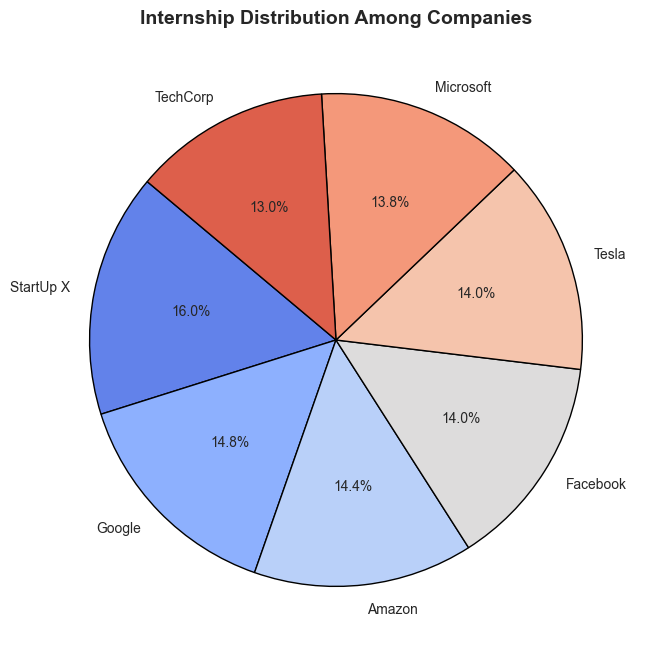

In [190]:
# Function to fetch internship distribution data
def fetch_internship_data():
    with driver.session() as session:
        query = """
        MATCH (c:Candidate)-[:HAS_INTERNSHIP]->(i:Internship)
        RETURN i.name AS Company, COUNT(c) AS CandidateCount
        ORDER BY CandidateCount DESC
        """
        result = session.run(query)
        return [(record["Company"], record["CandidateCount"]) for record in result]

# Fetch data
internship_data = fetch_internship_data()
companies, counts = zip(*internship_data)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(companies))

plt.pie(counts, labels=companies, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Formatting
plt.title("Internship Distribution Among Companies", fontsize=14, fontweight="bold")
plt.show()

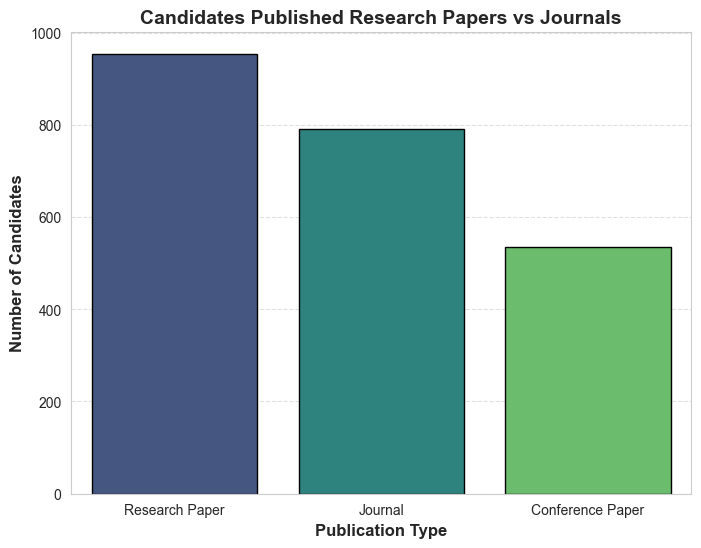

In [191]:
# Function to fetch publication data
def fetch_publication_data():
    with driver.session() as session:
        query = """
        MATCH (c:Candidate)-[r:PUBLISHED]->(p:Publication)
        RETURN p.type AS PublicationType, COUNT(c) AS CandidateCount
        ORDER BY CandidateCount DESC
        """
        result = session.run(query)
        return [(record["PublicationType"], record["CandidateCount"]) for record in result]

# Fetch data
publication_data = fetch_publication_data()
df = pd.DataFrame(publication_data, columns=["PublicationType", "CandidateCount"])

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Fix: Explicitly assign `hue=x` and disable legend
sns.barplot(data=df, x="PublicationType", y="CandidateCount", hue="PublicationType", 
            palette="viridis", edgecolor="black", legend=False)

# Formatting
plt.xlabel("Publication Type", fontsize=12, fontweight="bold")
plt.ylabel("Number of Candidates", fontsize=12, fontweight="bold")
plt.title("Candidates Published Research Papers vs Journals", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the chart
plt.show()

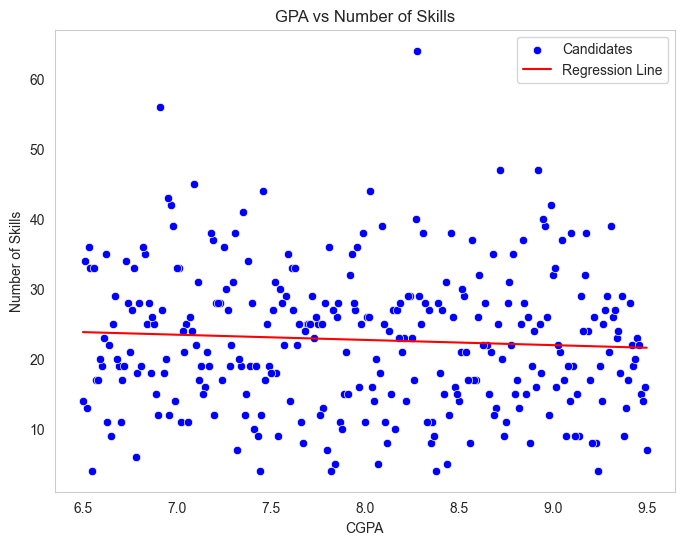

In [192]:
def fetch_data():
    query = """
    MATCH (c:Candidate)
    OPTIONAL MATCH (c)-[:HAS_SKILL]->(s:Skill)
    RETURN c.cgpa AS CGPA, COUNT(s) AS SkillCount
    """
    with driver.session() as session:
        result = session.run(query)
        data = [record.data() for record in result]
    return pd.DataFrame(data)

# Fetch Data from Neo4j
df = fetch_data()

# Regression Line Calculation using NumPy
X = df["CGPA"].values
Y = df["SkillCount"].values

slope, intercept = np.polyfit(X, Y, 1)  # Linear Regression (1st-degree polynomial)
df["Regression"] = slope * X + intercept  # Predicted values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["CGPA"], y=df["SkillCount"], label="Candidates", color="blue")
sns.lineplot(x=df["CGPA"], y=df["Regression"], color="red", label="Regression Line")

plt.xlabel("CGPA")
plt.ylabel("Number of Skills")
plt.title("GPA vs Number of Skills")
plt.legend()
plt.grid()
plt.show()
